In [1]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "D:/spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

In [38]:
from numpy import array
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel

dataPath ="completed.csv"
datacomplete=sc.textFile(dataPath)

In [39]:
print datacomplete

completed.csv MapPartitionsRDD[74] at textFile at <unknown>:0


In [40]:
datacomplete.collect()

[u',latitude,longitude',
 u'0,29.8830556,-97.9411111',
 u'1,29.38421,-98.581082',
 u'2,53.2,-2.916667',
 u'3,28.9783333,-96.6458333',
 u'4,21.4180556,-157.8036111',
 u'5,36.595,-82.1888889',
 u'6,51.434722,-3.18',
 u'7,41.1175,-73.4083333',
 u'8,33.5861111,-86.2861111',
 u'9,30.2947222,-82.9841667',
 u'10,33.9163889,-118.3516667',
 u'11,35.2333333,-82.7344444',
 u'12,40.6686111,-73.5275',
 u'13,37.1536111,-83.7619444',
 u'14,35.8238889,-80.2536111',
 u'15,36.8430556,-83.3219444',
 u'16,42.5377778,-83.2330556',
 u'17,41.3252778,-72.1936111',
 u'18,32.364167,-64.678611',
 u'20,42.3916667,-71.5666667',
 u'21,51.5,-3.2',
 u'22,38.1055556,-98.6597222',
 u'23,32.8544444,-79.975',
 u'24,45.5827778,-122.3522222',
 u'25,51.783333,-0.783333',
 u'26,29.4238889,-98.4933333',
 u'27,38.2541667,-85.7594444',
 u'28,40.7008333,-73.7133333',
 u'29,41.7002778,-73.9213889',
 u'30,53.970571,-111.689885',
 u'31,32.7152778,-117.1563889',
 u'32,38.7583333,-104.7425',
 u'33,29.7630556,-95.3630556',
 u'34,32.78

In [41]:
datacomplete.count()

37022

In [42]:
datanoheader = datacomplete.filter(lambda x:"latitude" not in x)
datasplit = datanoheader.map(lambda x:x.split(','))
datalatlng = datasplit.map(lambda x:x[1:])
datarr = datalatlng.map(lambda line: array([x for x in line]))
data = datarr.map(lambda line: ' '.join(line[0:2]))
data.take(10)

[u'29.8830556 -97.9411111',
 u'29.38421 -98.581082',
 u'53.2 -2.916667',
 u'28.9783333 -96.6458333',
 u'21.4180556 -157.8036111',
 u'36.595 -82.1888889',
 u'51.434722 -3.18',
 u'41.1175 -73.4083333',
 u'33.5861111 -86.2861111',
 u'30.2947222 -82.9841667']

In [43]:
parsedData = data.map(lambda line: array([float(x.strip()) for x in line.split(' ')]))
parsedData.take(10)

[array([ 29.8830556, -97.9411111]),
 array([ 29.38421 , -98.581082]),
 array([ 53.2     ,  -2.916667]),
 array([ 28.9783333, -96.6458333]),
 array([  21.4180556, -157.8036111]),
 array([ 36.595    , -82.1888889]),
 array([ 51.434722,  -3.18    ]),
 array([ 41.1175   , -73.4083333]),
 array([ 33.5861111, -86.2861111]),
 array([ 30.2947222, -82.9841667])]

In [44]:
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel

cluster = KMeans.train(parsedData, 3, maxIterations=10, initializationMode="random")

In [45]:
clusterData = parsedData.map(cluster.predict)
X = parsedData.collect()
label = clusterData.collect()

In [46]:
import numpy as np
import matplotlib.pyplot as plt


for point in range(len(label)):
    if (label[point]==0):
        color = "r";
    elif(label[point]==1) :
        color = "g";
    else :
        color = "b";
    lines = plt.plot(X[point][0], X[point][1], 'ro')
    plt.setp(lines, color=color, linewidth=2.0)


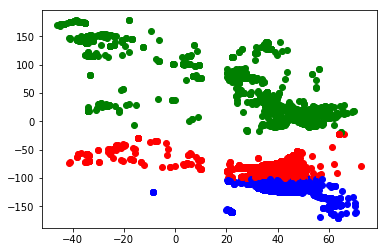

In [47]:
plt.show()